In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 인공지능으로 세상에 없던 새로운 패션 만들기

### 없던 데이터를 만들어낸다, 생성 모델링

생성 모델링은 지금까지 접해 보았던 기본적인 딥러닝 모델과는 사뭇 다르다.

무엇이 다른 걸까? 자, 우리가 이전에 배웠던 여러 이미지 또는 자연어 처리 모델을 떠올려 보자. 인공지능과 가위바위보 하기 프로젝트에서는 우리가 직접 가위, 바위, 보에 해당하는 사진을 찍어 데이터셋을 만들고, 각 이미지를 알맞은 카테고리로 분류할 수 있도록 학습시켰다. 이러한 모델을 우리는 판별 모델링(Discriminative Modeling)이라고 부른다. 말 그대로 입력받은 데이터를 어떤 기준에 대해 판별하는 것이 목표인 모델링이다.

반면, 오늘 배워 볼 생성 모델링은 말 그대로 없던 데이터를 생성해 내는 것이 목표다. 가위바위보 프로젝트로 대입해 본다면 다양한 가위, 바위, 보가 담긴 데이터셋에서 각 이미지의 특징을 학습해 그와 비슷한 새로운 사진을 만들어내야 하는 것이다. 물론 우리는 실제 사진과 거의 구별이 어려울 정도로 좋은 품질의 이미지를 만들어내는 것이 최종 목표다.

즉, 판별 모델과 생성 모델을 한마디로 설명해 보자면

판별 모델: 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞히는 모델

생성 모델 : 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델로 정리할 수 있다.

### 여러 가지 생성 모델링 기법과 친해지기 (1) Pix2Pix

#### 그림을 사진으로 변환해 보자: Pix2Pix

Pix2Pix는 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 바꿔줄 때 많이 사용되는 모델이다.

모델은 아래 그림처럼 단순화된 이미지(Input Image)와 실제 이미지(Ground Truth)가 쌍을 이루는 데이터셋으로 학습을 진행한다. 왼쪽의 Input Image를 입력받으면, 내부 연산을 통해 실제 사진 같은 형상으로 변환된 Predicted Image를 출력하는 거다. 학습 초기에는 모델이 생성한 Predicted Image가 Ground Truth 이미지와 많이 다르겠지만, 계속해서 Ground Truth와 얼마나 비슷한지를 평가하며 점차 실제 같은 결과물을 만들어 내게 된다. 이렇게 한 이미지를 다른 이미지로 픽셀 단위로 변환한다는 뜻의 Pixel to Pixel을 딴 Pix2Pix로 이름을 붙였다.

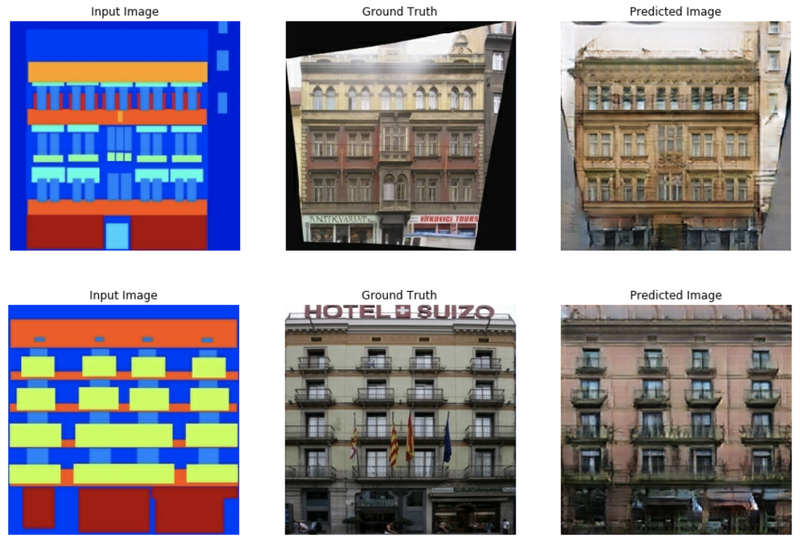

위의 예시를 보면 Input Image는 매우 단순화된 이미지이기 때문에 건물의 형태나 창문의 위치 등의 구조적인 정보를 알 수 있지만, 실제 세부적인 디자인이 어떻게 되어 있을지는 사람이라도 정확히 맞추기가 어렵다. 그래서 Prediccted Image에는 구조적인 정보를 바탕으로 건물 이미지를 만들며 그에 어울리는 세부 디자인을 생성하게 된다. 그 결과물은 Ground Truth와 완벽하게 똑같지는 않지만, 전체적인 분위기는 비슷한 느낌을 받는다.

### 여러 가지 생성 모델링 기법과 친해지기 (2) CycleGAN

#### 모네의 그림을 사진으로, 사진을 다시 모네의 그림으로 : CycleGAN

Pix2Pix 이후 발전된 모델로는 CycleGAN이 있다. 이름에서도 느꼈듯이 이 모델은 한 이미지와 다른 이미지를 번갈아 가며 Cyclic하게 변환시킬 수 있다.

언뜻 생각해 보면 그림을 사진으로 바꾸는 Pix2Pix와 비슷해 보이지만, 한 방향으로의 변환만 가능한 Pix2Pix와 달리 CycleGAN은 양방향으로의 이미지 변환이 가능하다. 즉, 실사 이미지를 그림으로 바꾸는 것과 그림을 실사 이미지로 바꾸는 것 두가지가 모두 가능한 것이다.

또한 그림과 사진의 쌍으로 이루어진 데이터셋이 필요했던 Pix2Pix와 달리, CycleGAN은 쌍이 필요 없다. 다음과 같이 얼룩말을 그냥 말로, 말을 얼룩말로 서로 변환할 경우 쌍을 이루지 않더라도 그냥 얼룩말이 있는 사진과 말이 있는 사진 각각의 데이터셋만 있다면 CycleGAN을 학습시킬 수 있다. 모델이 스스로 얼룩말과 말 데이터에서 각각의 스타일을 학습해서 새로운 이미지에 그 스타일을 입힐 수 있도록 설계되었기 때문이다. 딥러닝에서 쌍으로 된 데이터(paired data)가 필요 없다는 것은 데이터를 구하기 훨씬 쉽고, 라벨을 붙이는 주석(annotation) 비용이 필요 없다는 것을 뜻하니, 굉장히 큰 장점이라고 할 수 있다.

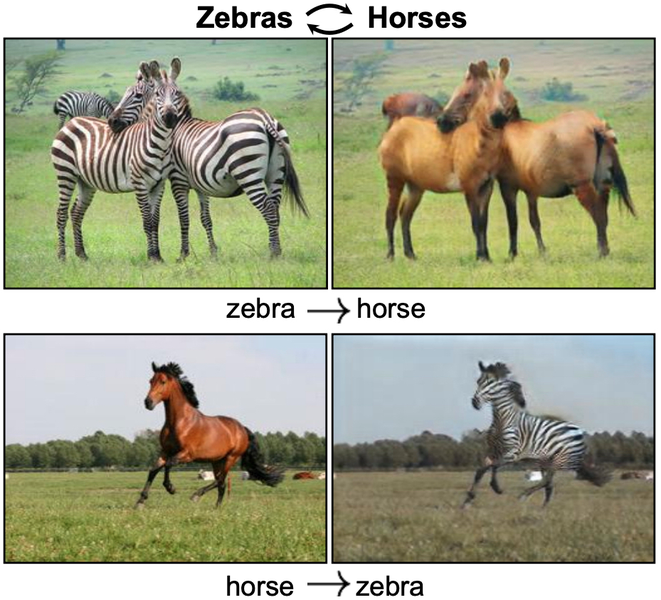

CycleGAN의 또 다른 유명한 활용 사례는 바로 실제 사진을 모네 또는 고흐 같은 화가가 그린 그림처럼 바꾸는 것이다. 다음과 같이 하나의 사진만으로도 모네가 그린 그림, 고흐가 그린 그림 등으로 마음대로 변환 시켜 볼 수 있다.

물론 CycleGAN이기 때문에 그림을 사진처럼 변환시키는 반대의 경우도 가능하다.

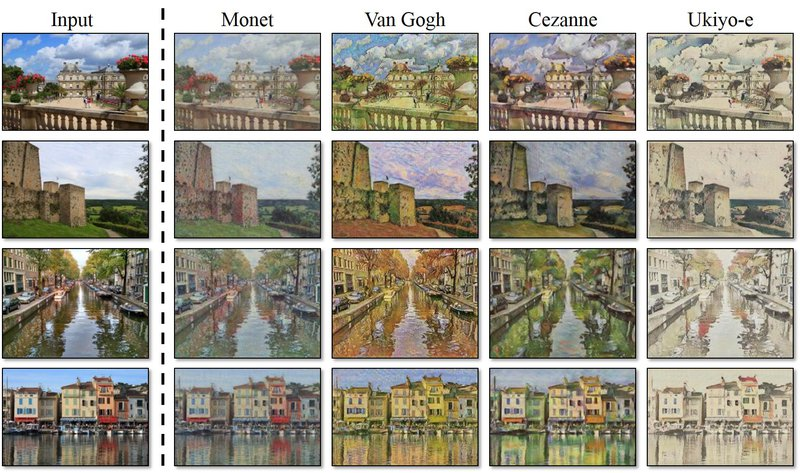

### 여러 가지 생성 모델링 기법과 친해지기 (3) Neural Style Transfer

#### 사진에 내가 원하는 스타일을 입혀보자: Neural Style Transfer

아지 흥미로운 기법 한 가지만 더 알아보자. 바로 스타일을 변환시키는 Neural Style Transfer이다.

Style Transfer라는 이름에서 알 수 있듯, 이 기법은 이미지의 스타일을 변환시킵니다. 전체 이미지의 구성을 유지하고 싶은 Base Image와 입히고 싶은 스타일이 담긴 Style Image 두 장을 활용해 새로운 이미지를 만들어 내는 것이다. 아, Neural은 신경망, 즉 딥러닝 기술을 사용했다는 뜻을 가지고 있다.

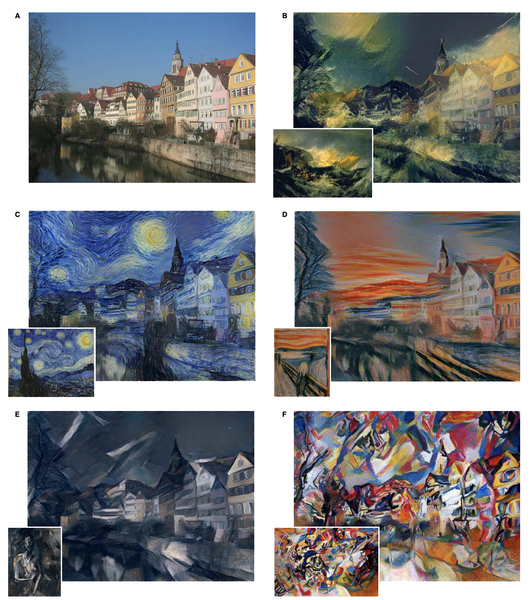

여섯 개의 이미지 중 왼쪽 맨 위의 이미지가 Base Image이고, 나머지 다섯 개의 이미지에 작게 붙어 있는 이미지가 Style Image이다. 이미지 B~F에 나타난 결과를 보면 Base Image의 건물, 강, 하늘과 같은 내용은 유지하면서, Style Image의 스타일이 잘 입혀진 것을 확인할 수 있다. 즉, Base Image에서는 Content(내용)만, 그리고 Style Image에서는 Style(스타일)만 추출해서 합친 결과물이다.

### 패선을 디자인하려면? 먼저 패션을 배워야지! (1)

#### Fashion MNIST

패션을 디자인한다는 것은 무엇일까?

사람의 경우를 생각해 보자. 멋있는 패션을 자유자재로 디자인하는 패션 디자이너가 되려면, 먼저 다양한 패션을 많이 접하면 좋은 패션이랑 무엇인지 학습해야 할 것이다. 그 후 학습한 것들을 토대로 나만의 디자인을 완성해나갈 수 있다.

생성 모델도 똑같다. 먼저 여러 패션을 접하며 옷, 신발 또는 드레스와 같은 것이 어떻게 생겼는지 학습한 후 새로운 디자인을 만들어내야한다.

따라서 모델이 학습할 데이터셋을 먼저 준비해 보겠다.

오늘 우리가 사용할 데이터셋은 Fashion MNIST이다. 숫자 데이터인 MNIST와 아주 비슷한 형태의 데이터 셋이다. 신경망 모델 연구 과정에서 MNIST 숫자 데이터가 아주 많이 활용되면서 몇가지 이유로 Fashion MNIST라는 데이터셋이 새롭게 구축되었다. 

### 패션을 디자인하려면? 먼저 패션을 배워야지! (2) 코드로 살펴보기

In [2]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.8.2


데이터를 꺼내서 load_data()로 데이터를 로딩해 볼 텐데, 특히 이번에는 분류 문제에서와 달리, 각 이미지가 어떤 카테고리인지 나태내주는 라벨이 필요 없다. 즉, 우리가 MNIST 데이터로 분류 몬제를 풀었을 때 필요했던 y_train, y_test에 해당하는 데이터를 쓰지 않는 거다. 그렇기 때문에 코드에서 \_(언더스코어)로 해당 데이터들은 무시하도록 하겠다.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


Fashion MNIST 또한 MNIST와 같이 28*28 픽셀의 이미지로, 각 픽설은 0~255 사이의 정숫값을 가진다.

이번 프로젝트에서는 각 픽셀을 -1, 1로 정규화시켜서 사용할 예정이므로, 중간값을 0으로 맞춰주기 위해 127.5를 뺀 후 127.5로 나눠준다.

In [5]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [6]:
train_x.shape

(60000, 28, 28)

앞서 읽었던 공식 문서에서 확인했듯이, train 데이터셋에는 6만 장의 이미지가 들어있다. 또, 이미지의 사이즈는 28*28임을 확인할 수 있다.

다만 여기서 한 가지 추가되어야 할 것이 있다.

앞서 CNN(합성곱) 계층을 다룰 때 배웠듯, 딥러닝에서 이미지를 다루려면 채널 수에 대한 차원이 필요하다. 입력되는 이미지 데이터의 채널 수는 어떤 이미지냐에 따라 달라진다. 컬러 이미지의 경우 R,G,B 세개의 채널이 있고, Gray Scale(흑백)의 경우 1개의 채널만 존재한다. Fashion MNIST 데이터는 흑백 이미지이므로, 채널 값은 1이다. 따라서 데이터셋의 shape 마지막에 1을 추가해 주도록 하겠다.

In [7]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

마지막에 1의 채널이 잘 추가 되었다.

그러면 이제 거의 준비가 다 되었다. 한번 첫번째 데이터를 꺼내서 어떻게 생겼는지 확인해보자.

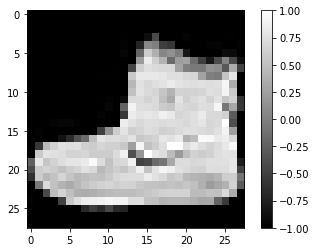

In [8]:
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

첫번째, 즉 index 0의 이미지는 신발이었던 것을 알 수 있다.

plt.colorbar()를 이용해 오른쪽에 각 픽셀의 값과 그에 따른 색도 확인해보았다. 픽셀에는 우리가 정규화 해준대로 -1 ~ 1 사이의 값을 가지고, -1이 가장 어두운 검은색, 1이 가장 밝은 흰색을 띤다고 표시되어 있다.

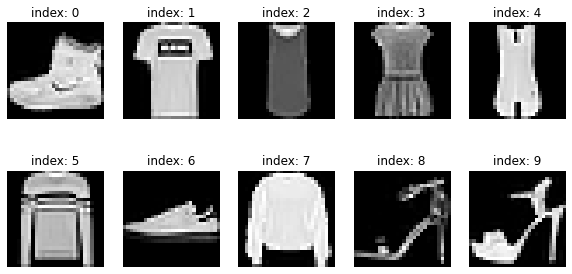

In [9]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

맨 첫 줄의 plt.figure(figsize=(10, 5))는 이미지의 전체 프레임의 크기를 결정한다. 궁금하다면 한 번 숫자를 바꿔서 실행시켜보자.

또한 여러 개의 이미지를 한 번에 띄우고 싶을 때는 plt.subplot(row, col, index)의 형태로 볼 수 있다.

10개의 이미지를 2*5의 배열 형태로 보고 싶은 경우, plt.subplot(2, 5, index)로 작성하면 되는 것이다. index는 1부터 10까지 순서대로 바꿔야 하니 for문에서 사용하는 i에 1을 i+1을 넣어주면 된다.(i는 range(10)으로 꺼냇으니 0~9의 숫자로 반복된다.)

추가적으로 plt.title('title') 함수를 이용해서 이미지에 제목으로 라벨 값을 넣어주고, plt.axis('off') 함수로 불필요한 축을 지워서 깔끔하게 나타냈다.

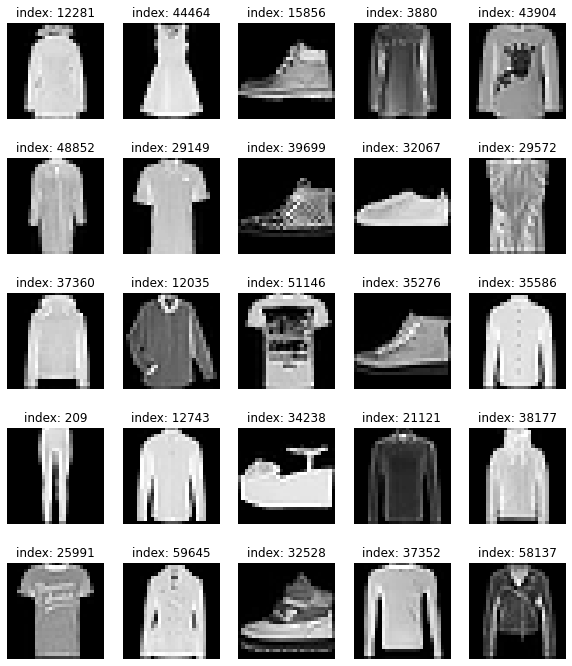

In [10]:
# 이미지 25개를 5*5의 배열로 train_images에서 랜덤으로 추출

plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(train_x[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

이제 데이터에 대한 전처리는 모두 마쳤다.

이렇게 정리된 데이터를 곧 모델에 넣어서 학습시켜야 하니, 편하게 사용할 수 있도록 텐서플로우의 Dataset을 이용해 준비해 놓도록 하겠다. 이를 이용하면 우리가 매번 모델에게 직접 섞어서 넣어주지 않아도 된다. 어떻게 사용하는지 곧 보도록 하겠다.

In [11]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

BUFFER_SIZE은 전체 데이터를 섞기 위해 60.000으로 설정한다. shffle() 함수가 데이터셋을 잘 섞어서 모델에 넣어줄 것이다.

BATCH_SIZE는 모델이 한 번에 학습할 데이터의 양이다.


너무 많은 양을 한 번에 학습시키면 메모리 활용 면에서도 비효율적이고, 한 번 학습을 하는 데에도 오래 걸리므로 적절한 사이즈로 잘라서 학습을 진행해야 한다. 이러한 방식을 미니 배치 학습이라고 한다.

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

 tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하면 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있다. 위 코드는 train_x라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나누도록 한다. 데이터가 잘 섞이게 하기 위해서는 버퍼 사이즈를 총 데이터 사이즈와 같거나 크게 설정하는 것이 좋다.

### 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (1) GAN 이해하기

#### GAN이란

자, 이제 데이터가 준비되었으니 모델을 만들어 볼 차례이다. 이번에 만들 모델은 어떻게 생겼을까?

위에서 많은 생성 모델들이 무엇이 할 수 있는지 먼저 살펴보았다. 하지만 그것들은 모두 꽤나 발전된 형태의 생성 모델링 기법들이다. 우리는 이제 첫 번째 생성 모델을 만드는 것이니 간단한 것부터 시작해보겠다.

가장 간단한 형태의 생성 모델 중 하나는 바로 GAN(Generative Adversarial Networ)이다. GAN은 2014년 Ian Goodfellow라는 연구자에 의해 처음 나온 네트워크로, 발표된 후 독특하면서도 직관적인 아이디어로 많은 인기를 얻었고 지금까지도 굉장히 많은 연구가 이루어지고 있는 모델이다.

          GAN은 생성 모델 중 하나이다

GAN에는 두가지 네트워크가 있다.

1. 생성자(Generator)는 아무 의미 없는 랜덤 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터를 생성해 낸다. 즉, 무에서 유를 창조하는 것과 같은 역활을 한다.

2. 판별자(Discriminator)는 기존에 있던 진짜 이미지와 생성자가 만들어낸 이미지를 입력받아 각 이미지가 Real 인지, Fake 인지에 대한 판단 정도를 실숫값으로 출력한다.

각 각은 위조지폐를 만들어내는 팀, 위조 지폐범을 잡아내는 경찰이라고 묘사되기도 한다.

위조지폐를 만들어내는 팀은 잡히지 않기 위해 더 진짜 같은 지폐를 만들려고 하며, 그것을 잡아내려는 경찰은 끊임없이 진짜 지폐와 위조지폐를 구분하려고 한다. 즉, 서로 간의 경쟁이 둘 모두를 성장하게 한다. 궁극적인 목표는 진짜 지폐와 구분될 수 없는 위조지폐를 만들어 내는 것이다.

이렇게 서로 경쟁하듯 이루어진 모델의 구조 덕분에 이름에 'Adversarial(적대적인)"이 들어가게 된 것이다.

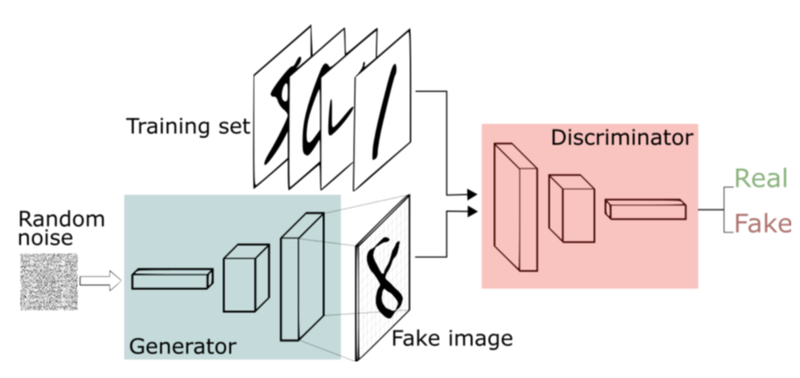

#### GAN과 생성 모델 다시 정리하기


GAN 중 특히 합성곱 층(Convolutional Layer)으로 이루어진 딥러닝 모델을 DCGAN (Deep Convolutional GAN)이라고 한다.

Input : 100 random numbers drawn from a uniform distribution (called as a code, or latent variables)

Output : an image (in this case 64x64x3 images)

GAN을 포함한 총 세가지 생성 모델링 기법

GAN

Variational Autoencoders(VAEs)

Autoregressive models (ex Pixel RNN)

### 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (2) 생성자 구현하기

GAN의 모델 구조를 알아보았으니, 바로 코드로 모델을 어떻게 구현할 수 있는 지 확인해 보자.

        GAN에는 생성자, 판별자 모델 두 개가 있다.

오늘 우리가 구현해 볼 모델은 이전 스텝에서 언급했던 DCGAN(Deep Convolutional GAN)이다. DCGAN은 GAN의 개념이 처음 소개된 1년 반 이후 발표된 논문으로서, 이전의 GAN을 더욱 발전시켜서 훨씬 그럴듯한 고화질 이미지 생성을 이루어낸 첫번째 논문으로 평가받는다. 

모델 구현은 Keras Sequential API를 활용하겠다. 이후 소개하는 코드는 Tensorflow 2.0 Tutorial의 DCGAN 구현을 기반으로 상세한 설명을 추가하겠다.

In [13]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

make_generator_model이라는 함수를 만들어서 언제든 생성자를 생성할 수 있도록 하겠다.

함수 내부에서는 먼저 tf.keras.Sequential()로 모델을 시작한 후 레이어를 차곡차곡 쌓아준다.

여기에서 가장 중요한 레이어는 바로 Conv2DTranspose 레이어이다. Conv2DTranspose 층은 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층이다. 이 모델에서는 세번의 Conv2DTranspose 층을 이용해 (7, 7, 256) -> (14, 14, 64) -> (28, 28, 1) 순으로 이미지를 키워나간다. 여기서 최종 사이즈인 (28, 28, 1)은 우리가 준비했던 데이터 셋과 형상이 동일하다.

레이어의 사이사이에 특정 층들이 반복되는 것을 확인할 수 있는데, BatchNormalization 레이어는 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화시켜준다. 또한 중간층들의 활성화 함수는 모두 LeakyReLU를 사용했다. 다만 마지막 층에는 활성화 함수로 tanh를 사용하는데, 이는 우리가 -1 ~1 이내의 값으로 픽셀 값을 정규화시켰던 데이터셋과 동일하게 하기 위함이다.

생성자의 입력 벡터는 모델의 입력값으로 (batch_size, 100) 형상의 노이즈 벡터를 받는다.

입력된 (batch_size, 100) 벡터는 7x7x256 = 12544개의 노드를 가진 첫번째 Dense 레이어를 거치며 (batch_size, 12544)형상의 벡터가 된다.

첫번째 레이어를 지난 후 벡터는 Reshape 레이어를 지나게 된다.

이는 이후의 Layer에서 Convolutional 연산을 할 수 있도록 1차원 벡터를 (7,7,256) 형상의 3차원 벡터로 변환시키는 작업이다.

그럼 생성 모델을 generator라는 변수로 생성하고, 모델 세부 내용인 summary를 출력해 봅시다.

In [14]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

그럼 모델을 만들어졌으니, shape=(1, 100)의 형상을 가지는 랜덤 노이즈 벡터를 생성해서 결과물을 한 번 만들어 보도록 하겠다.

아직 모델이 학습되지 않았으니, 아마 결과물도 큰 의미가 있지는 않을 것이다. 

tf.random.normal을 이용하면 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터를 만들 수 있다.

In [15]:
noise = tf.random.normal([1, 100])

텐서플로우 2.0 이후 버전에서는 레이와 모델에 call 메소드를 구현해 놓기 때문에, 방금 만들어진 생성자 모델에 입력값으로 노이즈를 넣고 바로 모델을 호출하면 간단히 결과 이미지가 생성된다 (내부적으로는 생성자의 call 함수가 호출된다)

단, 지금은 학습하는 중이 아니니 training=False를 설정해 주어야 한다. Batch Normalization 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기 때문에 training=False을 주어야 올바른 결과를 얻을 수 있다.

In [16]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

[1, 28, 28, 1] 사이즈의 이미지가 잘 생성되었다.

첫번째 1은 1개(batch_size=1)라는 뜻을, 그 뒤로는 (28, 28, 1)사이즈 이미지가 생성되었다는 뜻을 가진다.

그러면 이 이미지를 또 시각화해서 봐야겠다.
matplotlib 라이브러리는 2차원 이미지만 보여줄 수 있으므로 0번째와 3번째 축의 인덱스를 0으로 설정해서 (28, 28) shape의 이미지를 꺼낼 수 있도록 해야 한다.

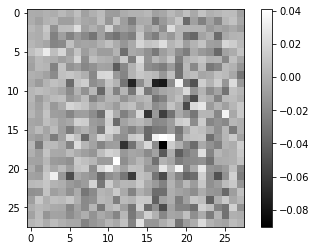

In [17]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

역시 -1과 1 사이의 값에서 적당히 잘 생성된 것을 확인할 수가 있다.

아직은 모델이 전혀 학습하지 않은 상태이기 때문에 아무런 의미가 없는 노이즈 같은 이미지가 생성되었지만, 모델이 점차 학습해 나가며 제대로 된 이미지를 생성하기를 바라본다.

### 그림을 만들어내는 화가 생성자, 그리고 평가하는 비평가 판별자 (3) 판별자 구현하기

이제 판별자를 설계해 보자.

판별자는 앞서 알아봤듯 가짜 이미지와 진짜 이미지를 입력받으면 각 이미지 별로 '진짜라고 판단하는 정도'값을 출력해야 한다. 그렇다면 입력은 (28, 28, 1)크기의 이미지가, 출력은 단 하나의 숫자(진짜라고 판단하는 정도)가 될 것이다.

In [18]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

판별자 또한 make_discriminator_model 함ㅁ수로 구현했다.

Conv2DTranspose 층을 사용해서 이미지를 키워나갔던 생성자와 반대로, 판별자는 Conv2D 층으로 이미지의 크기를 점점 줄여나간다. 첫번째 Conv2D 층에서 입력된 [28, 28, 1] 사이즈의 이미지는 다음 층을 거치며 (28, 28, 1) -> (14, 14, 64) -> (7, 7, 128)까지 줄어들게 된다.

마지막에는 Flatten 층을 사용해 3차원 이미지를 1차원으로 쭉펴서 7x7x128=6272, 즉 (1, 6272) 형상의 벡터로 변환한다. 이는 생성자의 Reshape 층에서 1차원 벡터를 3차원으로 변환했던 것과 정확히 반대 역활을 한다. 1차원 벡터로 변환한 후에는 마지막 Dense Layer를 거쳐 단 하나의 값을 출력하게 된다.

그럼 판별 모델을 discriminator라는 변수 이름으로 생성하고, 모델 세부 내용인 summary를 출력해 보자.

In [19]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

그렇다면 아까 생성했던 가짜 이미지를 판별자에 입력시키면 어떤 결과가 나올까? 

In [20]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00269374]], dtype=float32)>

텐서플로우의 텐서 형태로 출력이 되었다. 이 값 또한 아직은 아무런 의미가 없는 값일 것이다.

### 생성 모델이 똑똑해지기 위한 기나긴 여정 (1) 손실함수와 최적화 함수

이제 생성자와 판별자 두가지 네트워크가 모두 준비되었으니 모델을 학습시키는 일만 남았다.

생성자가 판별자를 속이기 위해 학습해 나가면서 결국 잘 학습되면 어떤 새로운 패션을 만들어낼지 궁금하다.

이제 모델 학습을 위한 재료를 준비해 봅시다.

딥러닝 모델이 학습하기 위해서 꼭 필요한 두가지는, 바로 손실함수(loss function)와 최적화 함수(optimizer)이다.

#### 손실함수(loss function)

GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용한다.

교차 엔트로피는 앞서 분류 모델을 설계할 때 많이 사용했던 손실함수이다. 점점 가까워지기 원하는 두 값이 얼마나 큰 차이가 나는지를 정량적으로 계산할 때 많이 쓰인다. 특히 판별자는 한 개의 이미지가 가짜인지 진짜인지 나타내는 2개 클래스 간 분류 문제를 풀어야 하므로, 이진 교차 엔트로피(binary cross entropy)를 사용할 것이다.

자, 이쯤에서 다시 생성자와 판별자의 목적이 무엇이었는지 한번 정리해 보자. 생성자는 자기가 생성한 Fake Image를 판별자가 진짜라고 판단하도록 속이고 싶어 한다. 판별자는 생성자가 생성한 가짜 이미지를 가짜로, 진짜 이미지를 진짜로 잘 판별하는 것이 목표이다.

그렇다면 Real Image에 대한 라벨을 1, Fake Image에 대한 라벨을 0으로 두었을 때, 각각의 손실함수를 이용해 정량적으로 달성해야 하는 목표하는 결과는 다음과 같다.

1. 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것

2. 판별자 : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워 지는 것

결국 생성자든 구분자든, 결국 손실함수에 들어가는 값은 모두 판별자의 판별값이 되겠다! 이러한 기준을 가지고 생성자, 판별자 각각에 대한 손실함수를 설계해 보자.

손실함수에 사용할 교차 엔트로피 함수는 tf.keras.losses 라이브러리 안에 있다.

다만, 우리가 교차 엔트로피를 계산하기 위해 입력할 값은 판별자가 판별한 값인데, 판별자 모델의 맨 마지막 Layer에는 값을 정규화시키는 sigmoid나 tanh 함수와 같은 활성화 함수가 없다. 즉, 구분자가 출력하는 값은 범위가 정해지지 않아 모든 실숫값을 가질 수 있다.

그런데 tk.keras.losses의 BinaryCrossEntropy 클래스는 기본적으로 본인에게 들어오는 인풋값이 0~1 사이에 분포하는 확률값이라고 가정한다. 따라서 from_logits를 True로 설정해 주어야 BinaryCrossEntropy에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0 ,1 사이의 값으로 정규화한 후 알맞게 계산할 수 있다.

In [21]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

그럼, 이제 cross_entropy를 활용해 계산할 loss들은 fake_output와 real_output 두가지를 활용한다.

1. fake_output : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 D(fake_image)

2. real_output : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 D(real_image)

그럼 이제, fake_output과 real_output을 각각 1 또는 0에 비교를 해야 하는데, 어떻게 비교할 수 있을까?

바로 tf.ones_like()와 tf.zeros_like() 함수를 활용하면 된다.

이 함수들은 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 가득 채워진 벡터를 만들고 싶을 때 사용한다.

어떤 식으로 활용되는지, 한 번 실험해 보자.


In [22]:
vector = [[1, 2, 3],
          [4, 5, 6]]

tf.ones_like(vector)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

어떤가? 입력해 준 vector와 형태는 같지만, 그 내용물은 모두 1인 벡터가 만들어졌다. 간단히 원하는 영벡터 또는 1로 채워진 벡터를 만들어 낼 수 있다.

#### generator_loss

그러면 generator_loss는 다음과 같이 구현할 수 있다.

generator_loss는 fake_output가 1에 가까워지기를 바라므로, 다음과 같이 tf.ones_like와의 교차 엔트로피값을 계산하면 된다. 즉, cross_entropy(tf.ones_like(fake_output), fake_output) 값은 fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가진다.

In [23]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#### discriminator_loss

반면, discriminator_loss는 real_output 값은 1에 가까워지기를, fake_output 값은 0에 가까워지기를 바라므로, 두가지 loss값을 모두 계산한다. real_output은 1로 채워진 벡터와, fake_output은 0으로 채워진 벡터와 비교하면 된다.



최종 discriminator_loss 값은 이 둘을 더한 값이다.

In [24]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

#### discriminator accuracy

한편, 판별자가 real output, fake output을 얼마나 정확히 판별하는지의 accuracy를 계산해 보는 것도 GAN의 학습에서 매우 중요하다.

특히 두 accuracy를 따로 계산해서 비교해 보는 것이 매우 유용하다.

만약 판별자가 real output과 fake output을 accuracy가 1.0에 가까울 정도로 정확하게 판별해 낸다면 좋은 것일까? 그렇지 않다. 이 경우 생성자가 만들어내는 fake output이 real output과 차이가 많이 나기 때문에 판별자가 매우 쉽게 판별해 내고 있다는 뜻이다. 그래서, real accuracy가 1.0에 더 가깝다면 아직은 생성자가 판별자를 충분히 잘 속이지 못하고 있다는 뜻이다.

In [25]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

위 함수 안에 사용된 tensorflow 함수들의 역할을 순차적으로 예를 들어 정리하면 다음과 같다

real_output = tf.Tensor([0.2,0.4,0.7,0.9])라면,

1. (1) tf.math.greater_equal(real_output, tf.constant([0.5]) : real_output의 각 원소가 0.5 이상인지 True, False로 판별

-> tf.Tensor([False, False, True, True])

2. (2) tf.cast( (1), tf.float32) : (1)의 결과가 True이면 1.0, False이면 0.0으로 변환

-> tf.Tensor([0.0, 0.0, 1.0, 1.0])

3. (3) tf.reduce_mean ((2)) : (2)의 결과를 평균내어 이번 배치의 정확도(accuracy)를 계산

-> 0.5

#### 최적화 함수(optimizer)

이제 손실함수는 모두 설계가 되었다. 이제 최적화 함수를 설정할 차례이다. 이번에는 Adam 최적화 기법을 활용해 보겠다.

Adam 함수 또한 tf.keras.optimizers 안에 있다.

중요한 하이퍼 파라미터인 "learning rate"는 0.0001로 설정할 텐데, 학습 품질을 올려보고 싶다면 여러 가지로 값을 바꾸어 가며 학습을 진행해 보는 것을 추천한다.

또한, 중요한 점 한가지는 생성자와 구분자는 따로따로 학습을 진행하는 개별 네트워크이기 때문에 optimizer를 따로 만들어주어야 한다는 점이다.

In [26]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

또한, 매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인할 것이다.

샘플은 한 번에 16장을 생성하도록 하겠다.

생성할 샘플은 매번 같은 노이즈로 생성해야 그에 대한 진전 과정을 확인할 수 있으므로, 고정된 seed 노이지를 만들어두어야 한다.

즉, 100차원의 노이즈를 총 16개, (16,100) 형상의 벡터를 두도록 하겠다.

In [27]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

### 생성 모델이 똑똑해지기 위한 기나긴 여정 (2) 훈련과정 설계

그렇다면 이제 진짜 훈련을 위한 코드를 만들어 보겠다.

하나의 미니 배치 당 진행할 train_step 함수를 먼저 만들어야 한다.

텐서플로우 2.0 이후부터는 1.x의 이전버전과 다르게, session을 사용하지 않는다. 대신, 학습시킬 훈련 함수 위에 @tf.function이라는 데코레이터를 붙여서 사용한다. 이 데코레이터는 우리가 직접 session을 열어서 학습했다가, 학습이 완료되면 다시 닫아주는 등의 번거로운 과정을 내부적으로 처리해서 더욱 편리하게 학습시킬 수 있게 해준다.

데코레이터의 개념은 어렵지 않더라도 @tf.function 이 정확히 어떤 역활을 해주는 것인지 명확이 이해가 안 될 수도 있다. Tensorflow Tutorial에는 이 데코레이터의 역활을 다음과 같이 정의한다.

          tf.function : Compiles a function into a callable TensorFlow graph

In [28]:
import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [29]:
import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

Numpy array 입력 x, y를 동일하게 사용했지만 f(x,y)의 결과 타입은 다르다. @tf.function 데코레이터가 사용된 함수에 입력된 입력은 Tensorflow의 graph 노드가 될 수 있는 타입으로 자동 변환된다. 알아두면 향후 Tensorflow 모델 구현에 매우 편리하게 사용할 수 있을 것이다.

In [30]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

train_step 함수를 뜯어보면 다음과 같다.

1. (1) 입력 데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음
2. (2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함
3. (3) tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기
4. (4) generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성
5. (5) discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력
6. (6) loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산
7. (7) accuracy 계산 : fake_output, real_output으로 discriminator의 정확도 계산
8. (8) gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산
9. (9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신
10. (10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴

그러면, 이렇게 한 단계씩 학습할 train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수를 만들어 보자.

아까 만들어 놓았떤 고정된 seed를 이용해서 결과물을 만들어내므로, 고정된 seed에 대한 결과물이 얼마나 나아지고 있는지를 확인할 수 있다.

In [31]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('/content/drive/MyDrive/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(epoch, it))

    plt.show()

model이 16개의 seed가 들어있는 sample_seeds를 입력받아서 만들어낸 prediction을 matplotlib으로 시각화해주는 과정이 담겨 있는데, 어딘가 익숙하지 않는가?

바로 우리가 위에서 해봤던, subplot을 이용해서 총 16개의 sample을 시각화하는 과정이다. 16개이므로 4행 4열로 나누어 subplot(4,4, I+1)로 시각화하는 것이다.

또한, plt에 저장되어 보이는 이미지를 plt.savefig로 간단히 파일로 저장한다.

학습 과정을 체크하기 위해 시각화해 보아야 할 중요한 것으로 loss와 accuracy 그래프를 빼놓을 수 없다. GAN의 학습 과정은 지도학습 모델보다 까다로운데, 이것은 두 모델이 서로의 학습 과정에 영향을 주고받기 때문이다. train_step() 함수가 리턴하는 gen_loss, disc_loss, real_accuracy, fake_accuracy 이상 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가 매 epoch마다 시각화하는 함수를 만들어 보자. 예를 들어 생성자의 loss의 history는 history['gen_loss']로 접근할 수 있는 list로 관리할 예정이다.

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('/content/drive/MyDrive/training_history/train_history_{:04d}.png'
                    .format( epoch))
    plt.show()

다음은 정기적으로 모델을 저장하기 위한 checkpoint를 만들어 준다.

tf.train.Checkpoint를 활용하면 매번 모델을 직접 저장해 주지 않아도, 코드 한 줄로 빠르고 편하게 버전 관리를 할 수 있다.

모델이 복잡해지고 학습 속도가 오래 걸릴수록, 모델에 대한 저장 및 버전 관리는 필수적이다. 아주 오랜 시간 동안 학습을 시켰는데 네트워크가 끊긴다거나, 예상치 못한 문제로 인해 모델을 잃어버린다면 그보다 끔찍한 일은 없다.

checkpoint에는 optimizer와 생성자, 판별자를 모두 넣어 저장한다. 정확히는 생성자와 판별자가 학습한 모델 가중치를 저장하는 것이다. 게임의 체크포인트처럼 우리의 학습 환경과 학습한 내용을 저장해 둔다.

checkpoint 모델을 저장하기 위해 작업환경 내에 training_checkpoints라는 디렉토리를 사용하겠다.

In [33]:
checkpoint_dir = '/content/drive/MyDrive/Colab Notebooks/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

### 생성 모델이 똑똑해지기 위한 기나긴 여정 (3) 학습 시키기

자, 이제 대망의 모델 학습이다.

지금까지 한 단계를 학습하는 train_step, 샘플 이미지를 생성하고 저장하기 위한 generate_and_save_images(), 학습 과정을 시각화하는 draw_train_history(), 그리고 모델까지 저장하기 위한 checkpoint까지 모두 준비가 되었으니 이것들을 합치기만 하면 된다.

In [34]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

여기서부터는 정말 별로 특별한 것이 없다. 우리가 생성된 샘플을 시각화하거나 원하는 시간을 출력하는 것뿐이다.

출력하고자 하는 print문과 몇 번마다 출력하는지에 대한 구문을 원하는 대로 수정해서 마음에 드는 형태로 확인해 보자.

그러면 모델을 저장하는 간격을 담당하는 save_every와 전체 학습 에포크를 결정하는 EPOCHS 파라미터도 설정해 준 후 훈련시켜 보도록 하겠다.


이제 다음과 같이 train() 함수를 실행시키면 드디어 모델이 학습해 나가면서 만들어내는 결과물을 실시간으로 확인할 수 있다. 

In [35]:
save_every = 5
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

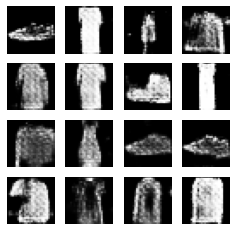

Time for training : 728 sec


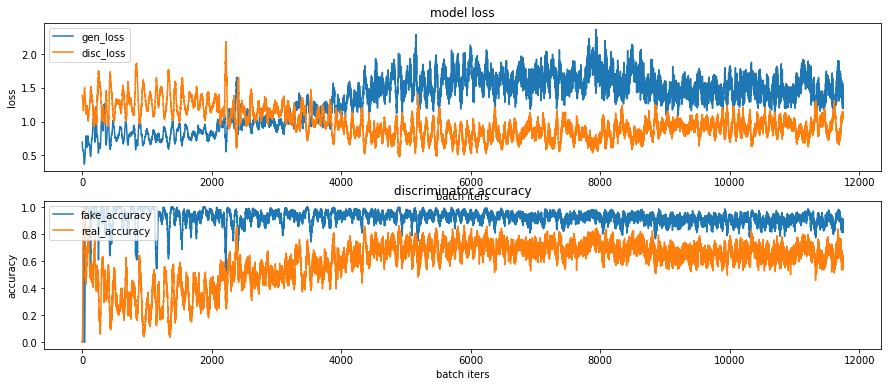

CPU times: user 4min 56s, sys: 10.8 s, total: 5min 7s
Wall time: 12min 10s


In [36]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

만약 생성자가 만든 Fake Image에 대한 판별자의 Accuracy (fake_accuracy)가 계속 1에 가깝게 유지되고 있다면, 생성자가 만든 이미지가 아진 팍별자를 성공적으로 속이지 못하고 있다는 뜻이다.

보다 나은 결과물을 만들기 위해서는 더욱 많은 epoch으로 학습을 시켜야 한다. 결과물이 아직 흐릿하다면 더욱 많은 학습을 시켜야 한다.

과연 생성 모델이 이전에는 없던 새로운 디자인의 패션을 만들어내는 것을 확인할 수 있을 것이다.

어쩌면 단순히 학습 수행 시간만 늘리는 것보다, 모델 구조나 학습 방법을 바꾸어 봐야 할 수도 있다. 그래프를 유심히 보면서 학습 결과과가 더 이상 개선되고 있지 않은지 여부를 지속적으로 살펴봅시다.

#### 학습과정 시각화하기

학습이 끝난 후 우리가 생생했던 샘플 이미지를 합쳐 GIF 파일, 일명 움짤로 만들어 보겠다. 더욱 생생한 학습 진행 과정을 확인해 볼 수 있을 것이다.

GIF 파일은 우리가 오래전에 import 해놓았던 imageio 라이브러리를 활용해 만들 수 있다.

imageio.get_writer를 활용해서 파일을 열고, 거기에 append_data로 이미지를 하나씩 붙여나가는 방식이다.

아래 코드가 무사히 실행되면, fashion_mnist_dcgan.gif 파일이 저장되어 있는 것을 확인할 수 있다.

In [39]:
anim_file = '/content/drive/MyDrive/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('/content/drive/MyDrive/generated_samples/sample*.png')
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)



생성된 파일은 생성자가 만들어낸 이미지의 품질이 점점 개선되어 가는 과정을 한눈에 볼 수 있다.